**1. importation of packages**        

In [4]:
# importation of packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Matplotlib is building the font cache; this may take a moment.


- Importation of dataset

In [5]:
data = pd.read_csv("../data/german_credit_data.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


- Description and information of the dataset

In [6]:
# information
data.info()
# description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


**2. Data cleaning**


2.1. Identify missing values

In [7]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

2.2. Fill the missing values

In [8]:
# determine the values of each columns which has a missing values
print(data["Checking account"].unique())

print(data["Saving accounts"].unique())

['little' 'moderate' nan 'rich']
[nan 'little' 'quite rich' 'rich' 'moderate']


In [9]:
# fill the missing values (when i detect a missing value in one column on the line and i take a value from the other column from the
# same line to replace it)
data["Saving accounts"] = data["Saving accounts"].fillna(data["Checking account"])
data["Checking account"] = data["Checking account"].fillna(data["Saving accounts"])

# To fill the missing values when the two columns have a missing value on the same line i take the mode of each column
mode_sa = data["Saving accounts"].mode()[0]
mode_ca = data["Checking account"].mode()[0]

data["Saving accounts"] = data["Saving accounts"].fillna(mode_sa)
data["Checking account"] = data["Checking account"].fillna(mode_ca)

data.isna().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

2.3. Outlier detection

Credit Amount

3271.258
2319.5
951.7579999999998
72
     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
5     35    male    1    free          little           little           9055   
17    25    male    2     own          little           little           8072   
18    44  female    3    free          little         moderate          12579   
57    31  female    2     own          little           little           9566   
63    25    male    2     own          little         moderate          14421   
..   ...     ...  ...     ...             ...              ...            ...   
927   39    male    2    free          little           little          10297   
945   30  female    2     own      quite rich         moderate           8358   
953   26  female    3     own          little           little          10974   
980   49    male    2     own          little         moderate           8386   
983   26    male    2     own          little           little          

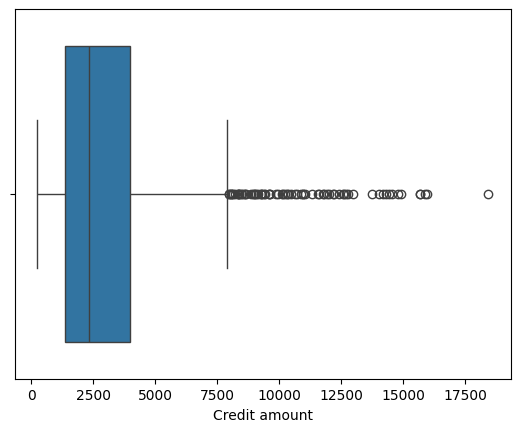

In [10]:

print(data["Credit amount"].mean())
print(data["Credit amount"].median())
print(data["Credit amount"].mean() - data["Credit amount"].median())
sns.boxplot(data=data, x="Credit amount")
q1 = data["Credit amount"].quantile(0.25)
q3 = data["Credit amount"].quantile(0.75)
iqr = q3 - q1
lower_bound_credit = q1 - 1.5 * iqr
upper_bound_credit = q3 + 1.5 * iqr 
data_outlier_credit = data[(data["Credit amount"] > upper_bound_credit) | (data["Credit amount"] < lower_bound_credit)]
print(len(data_outlier_credit))
print(data_outlier_credit)

In [11]:
data_credit = data[(data["Credit amount"] <= upper_bound_credit) & (data["Credit amount"] >= lower_bound_credit)]
print(data_credit["Credit amount"].mean())
print(data_credit["Credit amount"].median())


2676.260775862069
2145.5


<Axes: xlabel='Credit amount'>

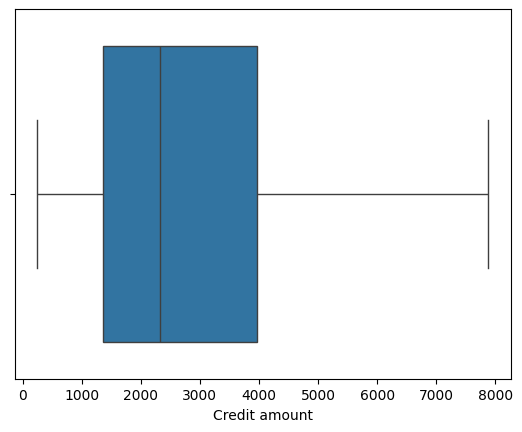

In [12]:
# Ajust the outlier values by replace the original value with the bound value
data["Credit amount"] = data["Credit amount"].apply(lambda x:min(max(x, lower_bound_credit),upper_bound_credit))
sns.boxplot(data=data, x="Credit amount")

In [13]:
# Remove duplicated data
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

2.4. Convert categorical data to numeric data

In [14]:
data_numeric = pd.get_dummies(data, columns=["Sex","Job", "Housing" ,"Saving accounts", "Checking account" ,"Purpose",  "Risk"])
data_numeric.head(1)

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,67,1169.0,6,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


**3.Data analysis**


Distribution of data

Correlation

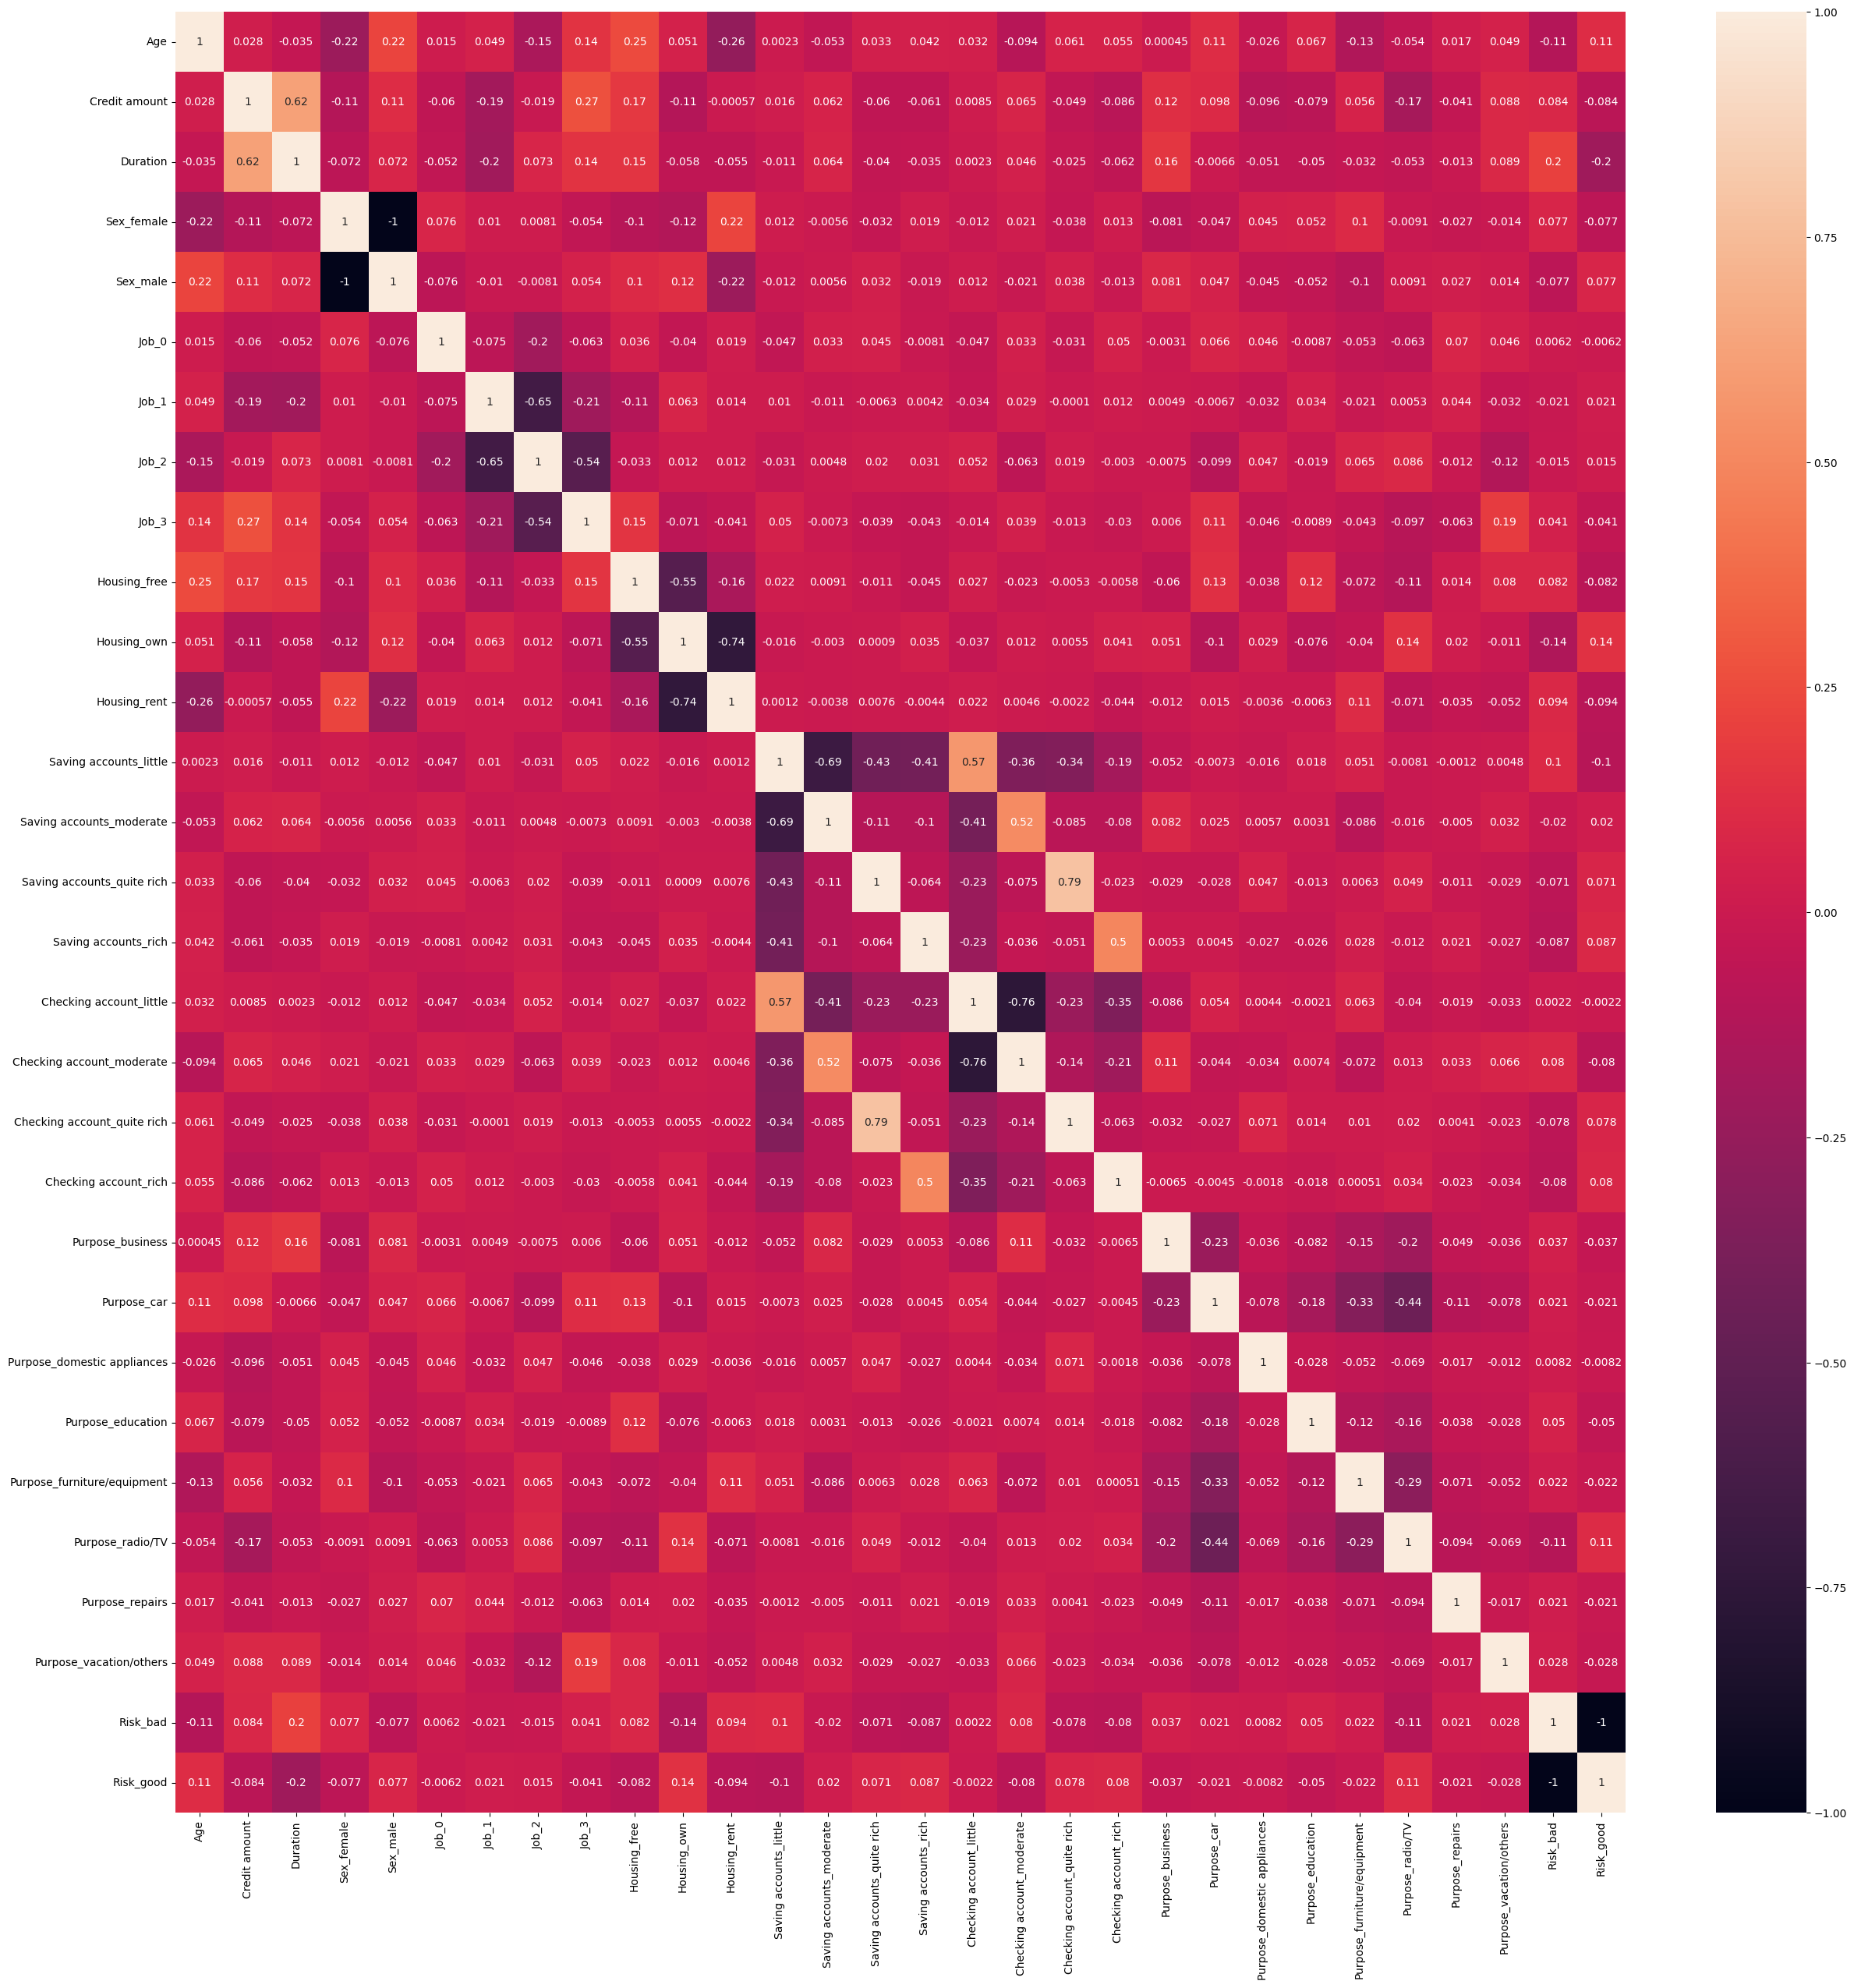

In [15]:
# Use a heatmap to visualize the correlation of variable
correlation_matrix = data_numeric.corr(method="spearman")
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [16]:
correlation_matrix["Risk_bad"]

Age                           -0.110409
Credit amount                  0.083761
Duration                       0.204061
Sex_female                     0.076624
Sex_male                      -0.076624
Job_0                          0.006187
Job_1                         -0.021085
Job_2                         -0.014753
Job_3                          0.041248
Housing_free                   0.082189
Housing_own                   -0.135745
Housing_rent                   0.093619
Saving accounts_little         0.101074
Saving accounts_moderate      -0.020282
Saving accounts_quite rich    -0.070643
Saving accounts_rich          -0.087482
Checking account_little        0.002179
Checking account_moderate      0.079595
Checking account_quite rich   -0.077732
Checking account_rich         -0.079732
Purpose_business               0.036675
Purpose_car                    0.020521
Purpose_domestic appliances    0.008195
Purpose_education              0.049527
Purpose_furniture/equipment    0.021717


In [17]:
print(correlation_matrix["Risk_good"])

Age                            0.110409
Credit amount                 -0.083761
Duration                      -0.204061
Sex_female                    -0.076624
Sex_male                       0.076624
Job_0                         -0.006187
Job_1                          0.021085
Job_2                          0.014753
Job_3                         -0.041248
Housing_free                  -0.082189
Housing_own                    0.135745
Housing_rent                  -0.093619
Saving accounts_little        -0.101074
Saving accounts_moderate       0.020282
Saving accounts_quite rich     0.070643
Saving accounts_rich           0.087482
Checking account_little       -0.002179
Checking account_moderate     -0.079595
Checking account_quite rich    0.077732
Checking account_rich          0.079732
Purpose_business              -0.036675
Purpose_car                   -0.020521
Purpose_domestic appliances   -0.008195
Purpose_education             -0.049527
Purpose_furniture/equipment   -0.021717


In [18]:
correlation_matrix

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
Age,1.000000,0.027522,-0.034804,-0.223709,0.223709,0.014980,0.048673,-0.148884,0.141371,0.245430,...,0.000452,0.114216,-0.026238,0.066585,-0.130835,-0.054357,0.017252,0.049032,-0.110409,0.110409
Credit amount,0.027522,1.000000,0.624140,-0.114621,0.114621,-0.060477,-0.193590,-0.018616,0.268349,0.165848,...,0.120316,0.098098,-0.095795,-0.079378,0.055960,-0.173670,-0.040594,0.087956,0.083761,-0.083761
Duration,-0.034804,0.624140,1.000000,-0.072191,0.072191,-0.052001,-0.196443,0.073294,0.143123,0.151750,...,0.163072,-0.006611,-0.050533,-0.049568,-0.031640,-0.052527,-0.012953,0.089122,0.204061,-0.204061
Sex_female,-0.223709,-0.114621,-0.072191,1.000000,-1.000000,0.076273,0.010479,0.008132,-0.054367,-0.101134,...,-0.081117,-0.047009,0.045212,0.052243,0.100185,-0.009090,-0.026935,-0.014375,0.076624,-0.076624
Sex_male,0.223709,0.114621,0.072191,-1.000000,1.000000,-0.076273,-0.010479,-0.008132,0.054367,0.101134,...,0.081117,0.047009,-0.045212,-0.052243,-0.100185,0.009090,0.026935,0.014375,-0.076624,0.076624
Job_0,0.014980,-0.060477,-0.052001,0.076273,-0.076273,1.000000,-0.075077,-0.195654,-0.062579,0.035621,...,-0.003136,0.066419,0.046066,-0.008660,-0.052878,-0.063270,0.070438,0.046066,0.006187,-0.006187
Job_1,0.048673,-0.193590,-0.196443,0.010479,-0.010479,-0.075077,1.000000,-0.652328,-0.208645,-0.109738,...,0.004905,-0.006710,-0.032203,0.033832,-0.021018,0.005258,0.044244,-0.032203,-0.021085,0.021085
Job_2,-0.148884,-0.018616,0.073294,0.008132,-0.008132,-0.195654,-0.652328,1.000000,-0.543739,-0.033378,...,-0.007519,-0.098962,0.046513,-0.018889,0.064780,0.086322,-0.012032,-0.124738,-0.014753,0.014753
Job_3,0.141371,0.268349,0.143123,-0.054367,0.054367,-0.062579,-0.208645,-0.543739,1.000000,0.154265,...,0.005992,0.114643,-0.045983,-0.008854,-0.042539,-0.097127,-0.062579,0.186806,0.041248,-0.041248
Housing_free,0.245430,0.165848,0.151750,-0.101134,0.101134,0.035621,-0.109738,-0.033378,0.154265,1.000000,...,-0.059734,0.127428,-0.038389,0.117900,-0.071706,-0.109602,0.013655,0.079977,0.082189,-0.082189


**Model**

In [19]:
# X data


X = data_numeric[["Age","Credit amount", "Duration", "Housing_free" ,"Housing_own","Housing_rent","Saving accounts_little",
                  "Saving accounts_moderate",
                  "Saving accounts_quite rich","Saving accounts_rich",
                  ]]

# Y data
y = data_numeric["Risk_good"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create a model
model = DecisionTreeClassifier(max_depth=2, random_state=42)
# train model
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

yo = data_numeric.head(1)
# Affichage des résultats
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')





Accuracy: 0.69
Confusion Matrix:
[[  8  55]
 [  7 130]]
Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.13      0.21        63
        True       0.70      0.95      0.81       137

    accuracy                           0.69       200
   macro avg       0.62      0.54      0.51       200
weighted avg       0.65      0.69      0.62       200



stability of the model


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Initialiser la validation croisée stratifiée
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Effectuer la validation croisée
cv_scores_stratified = cross_val_score(model, X_train, y_train, cv=skf)

# Afficher les résultats
print(f"Scores pour chaque pli (Stratified K-Fold): {cv_scores_stratified}")
print(f"Précision moyenne (Stratified K-Fold) : {cv_scores_stratified.mean():.4f}")
print(f"Écart-type des scores (Stratified K-Fold) : {cv_scores_stratified.std():.4f}")

Scores pour chaque pli (Stratified K-Fold): [0.70625    0.7375     0.7125     0.725      0.71069182]
Précision moyenne (Stratified K-Fold) : 0.7184
Écart-type des scores (Stratified K-Fold) : 0.0114


import model


In [21]:
import joblib
joblib.dump(model, "scoring_credit.pkl")

['scoring_credit.pkl']